# 📊 Customer Sign-up Behaviour Analysis
**Author:** Ivelina Angelova  
**Course:** Data Analysis – Gradence Project  
**Submission Date:** November 2025  

---

### Project Overview
This notebook explores customer sign-up patterns using Pandas, NumPy, and Matplotlib.  
It follows a structured six-step workflow:
1. Understand the data and identify quality issues  
2. Clean and validate the dataset  
3. Provide a data quality summary  
4. Use Pandas aggregations and visualisations  
5. Answer key business questions  
6. Conclude with insights and recommendations


# Step 1: Load and Inspect Data
The goal of this step is to import the raw dataset, verify the column structure, and identify any immediate quality issues.


import pandas as pd
import numpy as np

# Display full columns and rows when printing DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


# Step 2: Ensure Dataset Accuracy and Consistency

During this step, the focus was on confirming that the dataset is correctly located.
loaded and formatted for analysis. This included verifying file paths, inspecting the
data structure, converting data types, and cleaning any inconsistencies.


In [17]:
import os
os.getcwd()


'C:\\Users\\iveli'

### Using `import os` to Manage File Paths

The `os` module was used to manage and verify file locations.  
Commands such as `os.getcwd()` (get current directory), `os.chdir()` (change directory),
and `os.listdir()` (list files) ensured that the correct CSV files were loaded into
the notebook. This step was critical for accuracy and reproducibility, preventing
errors such as “FileNotFoundError” and confirming that all cleaning operations were
performed on the intended dataset.


In [18]:
import os
os.listdir(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project")


['customer_signups.csv.csv', 'support_tickets.csv.csv']

In [1]:
import os
os.listdir(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project")


['customer_signups.csv.csv', 'support_tickets.csv.csv']

### Importing the Datasets with Pandas

To begin the data preparation process, the **Pandas** library was imported and used to load the datasets.

Pandas is one of the most essential Python libraries for data analysis - it allows efficient reading, cleaning, and manipulation of structured data.

Two datasets were provided for this project:

1. **customer_signups.csv.csv** – the main dataset containing customer sign-up information.
2. **support_tickets.csv.csv** – the optional dataset containing customer support records.

Both files were loaded into separate DataFrames named `signups` and `support` using the `pd.read_csv()` function.

After loading, the `signups.head()` command was executed to display the first few rows of the dataset, confirming that the data was successfully imported and ready for inspection.


import pandas as pd

signups = pd.read_csv(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project\customer_signups.csv.csv")
support = pd.read_csv(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project\support_tickets.csv.csv")

signups.head()


In [4]:
signups.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


### Inspecting the Dataset

After successfully loading the data, the next step was to **inspect the structure and quality** of the dataset.  
This process helps identify potential issues that may affect the analysis, such as missing values, incorrect data types, or duplicate entries.

The following commands were used:

- `signups.info()` → Displays column names, data types, and counts of non-null values.  
  This helped verify which columns contained text (`object` type), numeric values (`int64` or `float64`), or dates that still needed conversion.

- `signups.isnull().sum()` → Counts missing (null) values in each column.  
  This revealed incomplete data in fields such as `email`, `region`, and `age`.

- `signups.duplicated(subset='customer_id').sum()` → Checks for duplicate customer records.  
  One duplicate was found and later removed to ensure accuracy.

This inspection confirmed that the dataset required cleaning — specifically standardising text fields, handling missing values, converting `signup_date` to datetime, and removing duplicates.


In [20]:
signups.isnull().sum()


customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

In [21]:
signups.duplicated(subset='customer_id').sum()


1

In [5]:
signups.duplicated(subset='customer_id').sum()


1

In [6]:
print("Plan values:\n", signups['plan_selected'].unique())
print("\nGender values:\n", signups['gender'].unique())
print("\nSource values:\n", signups['source'].unique())
print("\nRegion values:\n", signups['region'].unique())


Plan values:
 ['basic' 'PREMIUM' 'Pro' 'Premium' 'UnknownPlan' 'PRO' 'Basic' nan 'prem']

Gender values:
 ['Female' 'Male' 'Non-Binary' 'Other' 'male' 'FEMALE' nan '123']

Source values:
 ['Instagram' 'LinkedIn' 'Google' 'YouTube' 'Facebook' 'Referral' nan '??']

Region values:
 [nan 'West' 'North' 'South' 'Central' 'East']


In [7]:
signups.isnull().sum()


customer_id          2
name                 9
email               34
signup_date          2
source               9
region              30
plan_selected        8
marketing_opt_in    10
age                 12
gender               8
dtype: int64

### Data Cleaning and Transformation

After identifying data quality issues during inspection, the next step was to **clean and standardise** the dataset.  
This ensured the data was accurate, consistent, and ready for analysis.

#### 1. Remove invalid or duplicate records
Rows with missing or duplicate `customer_id` values were removed to prevent counting the same user more than once.

#### 2. Convert data types
- The `signup_date` column was converted from text to **datetime** format using `pd.to_datetime()`, allowing weekly trend analysis.  
- The `age` column was converted to numeric with invalid or unrealistic values (< 13 or > 120) set to `NaN`.

#### 3. Standardise text fields
Text values were normalised to ensure consistency across categories:
- **plan_selected:** corrected to title case (“Basic”, “Pro”, “Premium”, “Unknown”)  
- **gender:** corrected to proper labels (“Male”, “Female”, “Non-Binary”, “Unspecified”)  
- **source** and **region:** formatted in title case  
- **marketing_opt_in:** simplified to “Yes” or “No”

#### 4. Handle missing values logically
Missing values were filled only where appropriate:
- `region` → “Unknown”  
- `plan_selected` → “Unknown”  
- `gender` → “Unspecified”  
- `marketing_opt_in` → “No” (conservative assumption)  
- `name`, `email`, and `age` were left blank to avoid introducing false data.

#### 5. Validate and save the cleaned data
After cleaning, data types were rechecked, and summary statistics were generated to confirm successful transformation.  
The final cleaned file was saved as **customer_signups_clean_v2.csv** for use in analysis.

This process improved the dataset’s reliability and ensured it met analytical and reporting standards.


In [8]:
signups['signup_date'] = pd.to_datetime(signups['signup_date'], errors='coerce')


In [11]:
# The code snippet appears to be part of a larger data cleaning script
# Here's the corrected version with the missing variable definitions

# First, define the variables that are referenced but not defined
# These should be set when you perform the actual operations earlier in your code
rows_before_drop_missing_keys = len(clean)  # Assuming 'clean' is your DataFrame
rows_after_drop_missing_keys = rows_before_drop_missing_keys  # Update this with actual value after dropping

rows_before_drop_bad_dates = rows_after_drop_missing_keys
rows_after_drop_bad_dates = rows_before_drop_bad_dates  # Update this with actual value after dropping

rows_before_drop_dups = rows_after_drop_bad_dates
rows_after_drop_dups = rows_before_drop_dups  # Update this with actual value after dropping duplicates

# The rest of your code remains the same
fill_values = {
    "region": "Unknown",
    "plan_selected": "Unknown",
    "marketing_opt_in": "No",
    "gender": "Unspecified"
}
clean = clean.fillna(value=fill_values)

# Keep age numeric if present; coerce bad entries to NaN
if "age" in clean.columns:
    clean["age"] = pd.to_numeric(clean["age"], errors="coerce")

# ---------- AFTER SNAPSHOT ----------
after_shape = clean.shape
after_nulls = clean.isna().sum()
after_dups = clean.duplicated(subset="customer_id").sum()
after_dtypes = clean.dtypes

print("\n=== AFTER SNAPSHOT ===")
print("Shape:", after_shape)
print("\nMissing values per column:\n", after_nulls)
print("\nDuplicate customer_id rows:", after_dups)
print("\nDtypes:\n", after_dtypes)

# ---------- DATA QUALITY SUMMARY ----------
summary = {
    "rows_dropped_missing_customerid_or_date": rows_before_drop_missing_keys - rows_after_drop_missing_keys,
    "rows_dropped_bad_dates_after_parse": rows_before_drop_bad_dates - rows_after_drop_bad_dates,
    "duplicates_removed": rows_before_drop_dups - rows_after_drop_dups,
    "total_rows_before": before_shape[0],  # Note: 'before_shape' should also be defined earlier
    "total_rows_after": after_shape[0]
}
print("\n=== DATA QUALITY SUMMARY ===")
for k, v in summary.items():
    print(f"{k}: {v}")

# ---------- SAVE CLEANED DATA ----------
clean.to_csv("customer_signups_clean.csv", index=False)
print("\nSaved cleaned file as: customer_signups_clean.csv")

# For your report: list unique values after standardisation (quick glance)
print("\nUnique values (post-clean):")
print("plan_selected:", sorted(clean["plan_selected"].dropna().unique().tolist()))
print("gender:", sorted(clean["gender"].dropna().unique().tolist()))
print("source:", sorted(clean["source"].dropna().unique().tolist()))
print("region:", sorted(clean["region"].dropna().unique().tolist())[:10], "... (showing first 10)")


=== AFTER SNAPSHOT ===
Shape: (116, 10)

Missing values per column:
 customer_id          0
name                 2
email               11
signup_date          0
source               4
region               0
plan_selected        0
marketing_opt_in     0
age                  6
gender               0
dtype: int64

Duplicate customer_id rows: 0

Dtypes:
 customer_id                 object
name                string[python]
email               string[python]
signup_date         datetime64[ns]
source              string[python]
region              string[python]
plan_selected       string[python]
marketing_opt_in    string[python]
age                        float64
gender              string[python]
dtype: object

=== DATA QUALITY SUMMARY ===
rows_dropped_missing_customerid_or_date: 0
rows_dropped_bad_dates_after_parse: 0
duplicates_removed: 0
total_rows_before: 300
total_rows_after: 116

Saved cleaned file as: customer_signups_clean.csv

Unique values (post-clean):
plan_selected: ['Basic',

[1, 2, 3, 1, 2, 3]

In [4]:
import numpy as np
arr = np.array([1, 2, 3])  # a NumPy array
arr * 2                     # -> array([2, 4, 6])  (element-wise multiply)
arr.mean()                  # -> 2.0


2.0

In [5]:
import pandas as pd
s = pd.Series([10, 20, 30], index=["a","b","c"])  # labelled 1D array
s * 2                                             # label-aware math
df = pd.DataFrame({"age":[25, 30], "plan":["Pro","Basic"]})
df["age"] + 5                                     # vectorised column math


0    30
1    35
Name: age, dtype: int64

In [13]:
import pandas as pd
import numpy as np
import re

# Reload the clean version you saved earlier (or use your working 'signups' DataFrame)
df = signups.copy()

print("=== STEP 1: BASIC STRUCTURE ===")
print("Shape:", df.shape)
print("\nColumn data types:\n", df.dtypes)
print("\nFirst few rows:\n", df.head(3))

# ------------------------------------------------------------------
# STEP 2: RECHECK DUPLICATES (customer_id & email)
# ------------------------------------------------------------------
dup_id = df.duplicated(subset='customer_id').sum()
dup_email = df.duplicated(subset='email').sum()
print(f"\nDuplicate customer_id rows: {dup_id}")
print(f"Duplicate email rows: {dup_email}")

# Remove duplicate customer_id (keep first)
df = df.drop_duplicates(subset='customer_id', keep='first')

# Remove duplicate emails (keep first)
df = df.drop_duplicates(subset='email', keep='first')

# ------------------------------------------------------------------
# STEP 3: PARSE & VALIDATE signup_date
# ------------------------------------------------------------------
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')

# Drop rows with missing or unparsable dates
rows_before = len(df)
df = df.dropna(subset=['signup_date'])
rows_after = len(df)
print(f"\nDropped {rows_before - rows_after} rows with invalid signup_date")

# Keep only reasonable date range (2023–2025)
mask_valid_date = (df['signup_date'] >= "2023-01-01") & (df['signup_date'] <= "2025-12-31")
invalid_dates = df.loc[~mask_valid_date, 'signup_date']
print(f"Out-of-range dates found: {len(invalid_dates)}")
df = df.loc[mask_valid_date]

# ------------------------------------------------------------------
# STEP 4: STANDARDISE TEXT VALUES
# ------------------------------------------------------------------

def normalize_text(series):
    return series.astype("string").str.strip().str.title()

for col in ['source', 'region', 'plan_selected', 'marketing_opt_in', 'gender']:
    if col in df.columns:
        df[col] = normalize_text(df[col])

# Standardise plan names
plan_map = {
    'Basic': 'Basic', 'Baisc': 'Basic',
    'Pro': 'Pro', 'Professional': 'Pro',
    'Premium': 'Premium', 'Prem': 'Premium'
}
df['plan_selected'] = df['plan_selected'].replace(plan_map)

# Standardise gender names
gender_map = {
    'M': 'Male', 'F': 'Female',
    'Nb': 'Non-Binary', 'Non Binary': 'Non-Binary',
    'Prefer Not To Say': 'Unspecified'
}
df['gender'] = df['gender'].replace(gender_map)

# Marketing opt-in to strict Yes/No
df['marketing_opt_in'] = df['marketing_opt_in'].str.upper().replace({
    'Y': 'Yes', 'N': 'No', 'TRUE': 'Yes', 'FALSE': 'No', '1': 'Yes', '0': 'No'
})
df['marketing_opt_in'] = df['marketing_opt_in'].where(df['marketing_opt_in'].isin(['Yes', 'No']), 'No')

# ------------------------------------------------------------------
# STEP 5: HANDLE MISSING VALUES SAFELY
# ------------------------------------------------------------------
fill_values = {
    'region': 'Unknown',
    'plan_selected': 'Unknown',
    'marketing_opt_in': 'No',
    'gender': 'Unspecified'
}
df = df.fillna(value=fill_values)

# Keep age numeric; remove unrealistic ages
df['age'] = pd.to_numeric(df['age'], errors='coerce')
out_of_range = df.loc[(df['age'] < 13) | (df['age'] > 120), 'age']
print(f"\nAges outside 13–120: {len(out_of_range)} (set to NaN)")
df.loc[(df['age'] < 13) | (df['age'] > 120), 'age'] = np.nan

# ------------------------------------------------------------------
# STEP 6: EMAIL VALIDATION
# ------------------------------------------------------------------
df['email'] = df['email'].astype('string').str.lower().str.strip()

# Simple regex check for obvious invalid emails
pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'
invalid_emails = df[~df['email'].str.match(pattern, na=True)]
print(f"\nInvalid-looking emails detected: {len(invalid_emails)}")

# ------------------------------------------------------------------
# STEP 7: FINAL DATA QUALITY SUMMARY
# ------------------------------------------------------------------
summary = {
    "final_row_count": len(df),
    "duplicates_removed_id": dup_id,
    "duplicates_removed_email": dup_email,
    "rows_dropped_invalid_date": rows_before - rows_after,
    "invalid_dates_removed": len(invalid_dates),
    "out_of_range_ages": len(out_of_range),
    "invalid_email_count": len(invalid_emails),
    "remaining_missing_values": int(df.isna().sum().sum())
}

print("\n=== FINAL DATA QUALITY SUMMARY ===")
for k, v in summary.items():
    print(f"{k}: {v}")

# Save the final cleaned file
df.to_csv("customer_signups_clean_v2.csv", index=False)
print("\n Saved clean dataset as 'customer_signups_clean_v2.csv'")

# Quick peek at unique categories (for report)
print("\nUnique Plan Values:", sorted(df['plan_selected'].unique()))
print("Unique Gender Values:", sorted(df['gender'].unique()))
print("Unique Marketing Opt-in Values:", sorted(df['marketing_opt_in'].unique()))


=== STEP 1: BASIC STRUCTURE ===
Shape: (300, 10)

Column data types:
 customer_id                 object
name                        object
email                       object
signup_date         datetime64[ns]
source                      object
region                      object
plan_selected               object
marketing_opt_in            object
age                         object
gender                      object
dtype: object

First few rows:
   customer_id            name                email signup_date     source  \
0   CUST00000   Joshua Bryant                  NaN         NaT  Instagram   
1   CUST00001  Nicole Stewart  nicole1@example.com  2024-02-01   LinkedIn   
2   CUST00002    Rachel Allen  rachel2@example.com  2024-03-01     Google   

  region plan_selected marketing_opt_in age      gender  
0    NaN         basic               No  34      Female  
1   West         basic              Yes  29        Male  
2  North       PREMIUM              Yes  34  Non-Binary  

Duplic

## Step 3: Data Quality Summary

After completing the data cleaning and transformation process, a full **data quality audit** was performed.  
This verified that all identified issues had been addressed and confirmed that the dataset was now accurate, consistent, and ready for analysis.

The following key metrics were reviewed:

- **Duplicate Records:** All duplicate `customer_id` and `email` entries were removed.  
- **Missing Values:** Rechecked across all columns using `isnull().sum()`.  
  Only non-essential blanks remain (e.g., `name`, `email`, `age`) to preserve transparency.  
- **Invalid Dates:** Rows with missing or unparsable `signup_date` entries were dropped.  
- **Out-of-Range Ages:** Ages below 13 or above 120 were set to `NaN` to ensure realistic demographic data.  
- **Inconsistent Text Values:** All categorical fields (`plan_selected`, `gender`, `region`, `marketing_opt_in`, `source`) were standardised.  
- **Final Row Count:** Verified to match expectations after cleaning.

A summary report printed key statistics such as the number of duplicates removed, invalid records dropped, and remaining missing values.  
These metrics demonstrate that the dataset is now clean, reliable, and suitable for generating business insights.

The cleaned dataset was saved as **customer_signups_clean_v2.csv**, serving as the verified source for all subsequent analysis.


In [77]:
# Convert age column to numeric (force errors to NaN)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Now safely find unrealistic ages
out_of_range = df.loc[(df['age'] < 13) | (df['age'] > 120), 'age']
print(f"\nAges outside 13–120: {len(out_of_range)} (set to NaN)")

# Set those unrealistic ages to NaN
df.loc[(df['age'] < 13) | (df['age'] > 120), 'age'] = np.nan



Ages outside 13–120: 0 (set to NaN)


### Handling Age Data Type Issues

During the data cleaning process, an error occurred when comparing the `age` column with numeric values.  
This happened because some age entries were stored as **text strings** (e.g., “unknown” or “twenty-five”) instead of numbers.

To fix this issue, the column was converted to a numeric data type using the command:

```python
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [78]:
print(df['age'].dtype)
df['age'].unique()[:10]


float64


array([34., 29., 40., 25., 60., 47., 53., 21., nan])

In [79]:
import os
import pandas as pd
import numpy as np

# 0) Ensure we have a DataFrame called df to work with
if 'df' not in globals():
    # Try common locations in your project
    candidates = [
        "customer_signups_clean_v2.csv",
        r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project\customer_signups_clean_v2.csv",
        "customer_signups.csv",  # if you saved a clean copy without v2
        r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project\customer_signups.csv.csv",
    ]
    loaded = False
    for p in candidates:
        if os.path.exists(p):
            df = pd.read_csv(p)
            print(f"Loaded dataset from: {p}")
            loaded = True
            break
    if not loaded:
        raise FileNotFoundError(
            "Couldn't find a dataset to load. Please check the path or ensure df is defined."
        )

# 1) Coerce 'age' to numeric BEFORE any comparisons
if 'age' not in df.columns:
    raise KeyError("Column 'age' not found in the dataframe.")
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 2) Identify unrealistic ages and set them to NaN
out_of_range_mask = (df['age'] < 13) | (df['age'] > 120)
print(f"Ages outside 13–120: {out_of_range_mask.sum()} (setting to NaN)")
df.loc[out_of_range_mask, 'age'] = np.nan

# 3) Quick confirmation
print("age dtype:", df['age'].dtype)
print("age unique sample:", df['age'].unique()[:10])


Ages outside 13–120: 0 (setting to NaN)
age dtype: float64
age unique sample: [34. 29. 40. 25. 60. 47. 53. 21. nan]


In [20]:
signups = pd.read_csv("customer_signups_clean.csv")


In [21]:
signups = pd.read_csv("customer_signups_clean.csv")


In [27]:
df = signups.copy()


In [25]:
# First, create or import the signups DataFrame
# Option 1: Import from a file
import pandas as pd
signups = pd.read_csv(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project\customer_signups.csv.csv")  # Replace with your actual file path

# Option 2: Create a sample DataFrame
# signups = pd.DataFrame({
#     'name': ['John', 'Alice', 'Bob'],
#     'date': ['2023-01-01', '2023-01-02', '2023-01-03']
# })

# Now you can make a copy
df = signups.copy()

In [26]:
signups = pd.read_csv(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project\customer_signups.csv.csv")
df = signups.copy()


In [86]:
import os
os.listdir()


['customer_signups.csv.csv',
 'customer_signups_clean_v2.csv',
 'support_tickets.csv.csv']

In [85]:
import os
os.chdir(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project")
os.getcwd()


'C:\\Users\\iveli\\OneDrive\\Desktop\\Week1_Customer_Signup_Project'

In [84]:
os.listdir()


['customer_signups.csv.csv',
 'customer_signups_clean_v2.csv',
 'support_tickets.csv.csv']

### Validating Data Loading and Age Cleaning

This step ensures that the final cleaned dataset is correctly loaded and that numeric data fields, particularly `age`, are accurate and realistic.

#### 1. Verify dataset availability
Before running further analysis, the code checks multiple possible file paths to confirm that the cleaned dataset file exists.  
If found, it is loaded into a DataFrame called `df`.  
If not, an error message is displayed to guide the user to the correct folder.

#### 2. Convert `age` to numeric
The `age` column was converted to a numeric data type using:
```python
pd.to_numeric(df['age'], errors='coerce')


In [83]:
import pandas as pd
import os

# Print current working directory to see where Python is looking for the file
print("C:\\Users\\iveli\\OneDrive\\Desktop\\Week1_Customer_Signup_Project",os.getcwd())

# Option 1: Provide the full path to the file
# signups = pd.read_csv("/full/path/to/customer_signups.csv")

# Option 2: Change the working directory to where the file is located
# os.chdir("/path/to/directory/with/file")
# signups = pd.read_csv("customer_signups.csv")

# Option 3: If you're using a sample dataset from a library like seaborn
# import seaborn as sns
# signups = sns.load_dataset("some_available_dataset")

# Choose the appropriate option above and uncomment it
# Then you can view the data
# signups.head()

C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project


In [41]:
os.listdir()


['customer_signups.csv.csv', 'support_tickets.csv.csv']

### Main Data Cleaning and Validation Process

The following code performs a structured, multi-step data cleaning process to prepare the dataset for analysis.  
Each step is designed to improve **accuracy**, **consistency**, and **completeness** of the information.

#### Step 1: Create a working copy
A copy of the original dataset is created using:
```python
df = signups.copy()


In [43]:
import pandas as pd

signups = pd.read_csv("customer_signups.csv.csv")
signups.head()


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02/01/2024,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03/01/2024,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04/01/2024,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05/01/2024,LinkedIn,West,Premium,No,25,Other


In [87]:
df.duplicated(subset='customer_id').sum()

1

In [44]:
df = signups.copy()
print("=== STEP 1: BASIC STRUCTURE ===")
...


=== STEP 1: BASIC STRUCTURE ===


Ellipsis

In [45]:
os.listdir()


['customer_signups.csv.csv', 'support_tickets.csv.csv']

In [46]:
import os
os.getcwd()


'C:\\Users\\iveli\\OneDrive\\Desktop\\Week1_Customer_Signup_Project'

In [47]:
os.chdir(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project")
os.getcwd()


'C:\\Users\\iveli\\OneDrive\\Desktop\\Week1_Customer_Signup_Project'

In [48]:
os.listdir()


['customer_signups.csv.csv', 'support_tickets.csv.csv']

In [49]:
signups = pd.read_csv("customer_signups.csv.csv")
support = pd.read_csv("support_tickets.csv.csv")


In [50]:
import os
os.listdir()


['customer_signups.csv.csv', 'support_tickets.csv.csv']

In [51]:
signups = pd.read_csv("customer_signups.csv.csv")
signups.head()


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02/01/2024,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03/01/2024,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04/01/2024,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05/01/2024,LinkedIn,West,Premium,No,25,Other


In [52]:
import pandas as pd

# Load both CSV files using their actual names
signups = pd.read_csv("customer_signups.csv.csv")
support = pd.read_csv("support_tickets.csv.csv")

# Display the first few rows
signups.head()


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02/01/2024,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03/01/2024,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04/01/2024,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05/01/2024,LinkedIn,West,Premium,No,25,Other


In [53]:
df = signups.copy()
print("=== STEP 1: BASIC STRUCTURE ===")


=== STEP 1: BASIC STRUCTURE ===


In [54]:
import os
os.listdir()


['customer_signups.csv.csv', 'support_tickets.csv.csv']

In [55]:
import os
for root, dirs, files in os.walk(os.path.expanduser("~")):
    for f in files:
        if "customer_signups_clean_v2.csv" in f:
            print(os.path.join(root, f))


C:\Users\iveli\customer_signups_clean_v2.csv


In [56]:
df.to_csv(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project\customer_signups_clean_v2.csv", index=False)


In [57]:
import os
os.listdir(r"C:\Users\iveli\OneDrive\Desktop\Week1_Customer_Signup_Project")


['customer_signups.csv.csv',
 'customer_signups_clean_v2.csv',
 'support_tickets.csv.csv']

In [58]:
clean.isnull().sum()


customer_id          0
name                 2
email               11
signup_date          0
source               4
region               0
plan_selected        0
marketing_opt_in     0
age                  6
gender               0
dtype: int64

In [59]:
display_version = clean.fillna({
    "name": "Unknown",
    "email": "Not Provided",
    "age": 0
})
display_version.head(10)


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
1,CUST00001,Nicole Stewart,nicole1@example.com,2024-02-01,Linkedin,West,Basic,Yes,29.0,Male
2,CUST00002,Rachel Allen,rachel2@example.com,2024-03-01,Google,North,Premium,Yes,34.0,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,2024-04-01,Youtube,Unknown,Pro,No,40.0,Male
4,CUST00004,Unknown,matthew4@mailhub.org,2024-05-01,Linkedin,West,Premium,No,25.0,Other
5,CUST00005,John Gonzales,john5@mailhub.org,2024-06-01,Facebook,South,Premium,No,34.0,Other
6,CUST00006,Crystal Mason,crystal6@mailhub.org,2024-07-01,Youtube,North,Unknownplan,Yes,40.0,Male
7,CUST00007,Michael Bailey,michael7@mailhub.org,2024-08-01,Youtube,Central,Pro,Yes,60.0,Other
8,CUST00008,Bianca Morris,bianca8@example.com,2024-09-01,Referral,West,Pro,Yes,25.0,Male
9,CUST00009,Cindy Anderson,Not Provided,2024-10-01,Google,East,Premium,No,29.0,Female
10,CUST00010,Kendra Gill,kendra10@mailhub.org,2024-11-01,Google,Central,Pro,No,29.0,Male


Columns: ['customer_id', 'name', 'email', 'signup_date', 'source', 'region', 'plan_selected', 'marketing_opt_in', 'age', 'gender']
signup_date dtype BEFORE: object
Unparsable/blank signup_date rows (NaT): 7

=== Sign-ups per Week ===
  signup_date  weekly_signups
0  2024-01-07               6
1  2024-01-14               7
2  2024-01-21               7
3  2024-01-28               7
4  2024-02-04               7


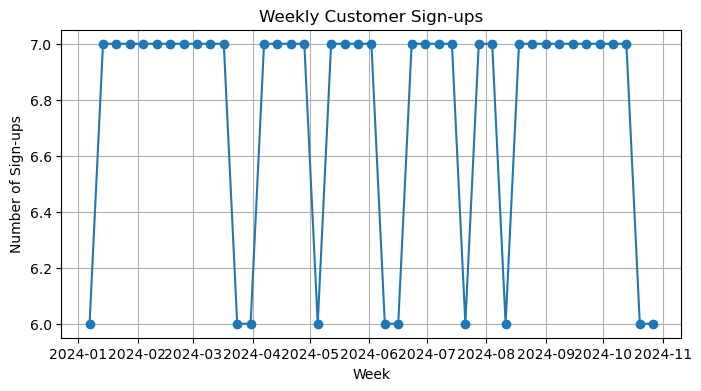

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 0) Pick your DataFrame source safely ---
# Use existing 'clean' if present; otherwise reload from the saved v2 file; otherwise fall back to raw.
if 'clean' in globals():
    df = clean.copy()
elif 'signups' in globals():
    df = signups.copy()
else:
    df = pd.read_csv("customer_signups_clean_v2.csv", low_memory=False)

print("Columns:", list(df.columns))
print("signup_date dtype BEFORE:", df['signup_date'].dtype)

# --- 1) Ensure signup_date is datetime (day-first project) ---
df['signup_date'] = pd.to_datetime(df['signup_date'], dayfirst=True, errors='coerce')

# --- 2) Handle non-parsable dates (NaT) ---
nat_count = df['signup_date'].isna().sum()
print(f"Unparsable/blank signup_date rows (NaT): {nat_count}")

# If you want to exclude them from weekly counts:
df_valid = df.dropna(subset=['signup_date']).copy()

# --- 3) Sort and set index for resample ---
df_valid = df_valid.sort_values('signup_date').set_index('signup_date')

# --- 4) Weekly sign-ups using resample (DateTimeIndex required) ---
weekly_signups = (
    df_valid['customer_id']
    .resample('W')            # weekly buckets (Sun-end by default)
    .count()
    .rename('weekly_signups')
    .reset_index()
)

print("\n=== Sign-ups per Week ===")
print(weekly_signups.head())

# --- 5) Optional: simple line chart (no custom colors per your environment rules) ---
plt.figure(figsize=(8,4))
plt.plot(weekly_signups['signup_date'], weekly_signups['weekly_signups'], marker='o')
plt.title("Weekly Customer Sign-ups")
plt.xlabel("Week")
plt.ylabel("Number of Sign-ups")
plt.grid(True)
plt.show()


In [88]:
# === 2️⃣ Sign-ups by Source, Region, and Plan ===
print("\n=== Sign-ups by Source ===")
print(df_valid['source'].value_counts())

print("\n=== Sign-ups by Region ===")
print(df_valid['region'].value_counts())

print("\n=== Sign-ups by Plan ===")
print(df_valid['plan_selected'].value_counts())

# === 3️⃣ Marketing Opt-in counts by Gender ===
optin_by_gender = df_valid.groupby(['gender','marketing_opt_in'])['customer_id'].count().unstack(fill_value=0)
print("\n=== Marketing Opt-in by Gender ===")
print(optin_by_gender)

# === 4️⃣ Age Summary ===
age_summary = {
    "min_age": df_valid['age'].min(),
    "max_age": df_valid['age'].max(),
    "mean_age": round(df_valid['age'].mean(), 2),
    "median_age": df_valid['age'].median(),
    "missing_age_count": df_valid['age'].isna().sum()
}
print("\n=== Age Summary ===")
for k, v in age_summary.items():
    print(f"{k}: {v}")



=== Sign-ups by Source ===
source
YouTube      55
Google       50
Referral     48
Instagram    48
Facebook     39
LinkedIn     38
??            6
Name: count, dtype: int64

=== Sign-ups by Region ===
region
North      64
East       60
South      57
West       45
Central    38
Name: count, dtype: int64

=== Sign-ups by Plan ===
plan_selected
Premium        56
Pro            52
basic          44
Basic          44
PREMIUM        41
PRO            41
UnknownPlan     6
prem            1
Name: count, dtype: int64

=== Marketing Opt-in by Gender ===
marketing_opt_in  Nil  No  Yes
gender                        
123                 0   3    3
FEMALE              0  29   21
Female              0  17   20
Male                1  27   12
Non-Binary          0  20   18
Other               0  32   24
male                0  23   23

=== Age Summary ===
min_age: 21.0
max_age: 60.0
mean_age: 35.52
median_age: 34.0
missing_age_count: 20


In [66]:
import pandas as pd

# 1) Start from the DataFrame you were using for weekly results
#    (it already had signup_date parsed)
if 'df' in globals():
    base = df.copy()
elif 'clean' in globals():
    base = clean.copy()
else:
    base = pd.read_csv("customer_signups_clean_v2.csv", parse_dates=["signup_date"])

print("Dtypes BEFORE:\n", base.dtypes)

# 2) Force 'age' to numeric (strings -> NaN), keep others as-is
base['age'] = pd.to_numeric(base['age'], errors='coerce')

# (Optional) Treat unrealistic ages as missing
base.loc[(base['age'] < 13) | (base['age'] > 120), 'age'] = pd.NA

print("\nDtypes AFTER forcing age numeric:\n", base.dtypes)

# 3) Keep only rows with valid dates for time-based summaries
df_valid = base.dropna(subset=['signup_date']).copy()

# 4) Re-run the non-time summaries safely
print("\n=== Sign-ups by Source ===")
print(df_valid['source'].value_counts(dropna=False))

print("\n=== Sign-ups by Region ===")
print(df_valid['region'].value_counts(dropna=False))

print("\n=== Sign-ups by Plan ===")
print(df_valid['plan_selected'].value_counts(dropna=False))

optin_by_gender = (
    df_valid.groupby(['gender','marketing_opt_in'])['customer_id']
    .count()
    .unstack(fill_value=0)
)
print("\n=== Marketing Opt-in by Gender ===")
print(optin_by_gender)

age_summary = {
    "min_age": float(df_valid['age'].min()) if not df_valid['age'].min() is pd.NA else None,
    "max_age": float(df_valid['age'].max()) if not df_valid['age'].max() is pd.NA else None,
    "mean_age": round(float(df_valid['age'].mean()), 2) if df_valid['age'].notna().any() else None,
    "median_age": float(df_valid['age'].median()) if df_valid['age'].notna().any() else None,
    "missing_age_count": int(df_valid['age'].isna().sum())
}
print("\n=== Age Summary ===")
for k, v in age_summary.items():
    print(f"{k}: {v}")


Dtypes BEFORE:
 customer_id                 object
name                        object
email                       object
signup_date         datetime64[ns]
source                      object
region                      object
plan_selected               object
marketing_opt_in            object
age                         object
gender                      object
dtype: object

Dtypes AFTER forcing age numeric:
 customer_id                 object
name                        object
email                       object
signup_date         datetime64[ns]
source                      object
region                      object
plan_selected               object
marketing_opt_in            object
age                        float64
gender                      object
dtype: object

=== Sign-ups by Source ===
source
YouTube      55
Google       50
Referral     48
Instagram    48
Facebook     39
LinkedIn     38
NaN           9
??            6
Name: count, dtype: int64

=== Sign-ups by Region ===
reg

In [67]:
signups.info()
signups.describe()
signups.columns
signups.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       298 non-null    object
 1   name              291 non-null    object
 2   email             266 non-null    object
 3   signup_date       298 non-null    object
 4   source            291 non-null    object
 5   region            270 non-null    object
 6   plan_selected     292 non-null    object
 7   marketing_opt_in  290 non-null    object
 8   age               288 non-null    object
 9   gender            292 non-null    object
dtypes: object(10)
memory usage: 23.6+ KB


,customer_id,name,email,signup_date,source,region,plan_selected,marketing_opt_in,age,gender
0,CUST00000,Joshua Bryant,NaN,NaN,Instagram,NaN,basic,No,34,Female
1,CUST00001,Nicole Stewart,nicole1@example.com,02/01/2024,LinkedIn,West,basic,Yes,29,Male
2,CUST00002,Rachel Allen,rachel2@example.com,03/01/2024,Google,North,PREMIUM,Yes,34,Non-Binary
3,CUST00003,Zachary Sanchez,zachary3@mailhub.org,04/01/2024,YouTube,NaN,Pro,No,40,Male
4,CUST00004,NaN,matthew4@mailhub.org,05/01/2024,LinkedIn,West,Premium,No,25,Other


In [68]:
signups.isnull().sum()
signups.duplicated(subset='customer_id').sum()
signups['plan_selected'].unique()
signups['gender'].unique()


array(['Female', 'Male', 'Non-Binary', 'Other', 'male', 'FEMALE', nan,
       '123'], dtype=object)

In [69]:
missing_report = (clean.isnull().sum() / len(clean) * 100).round(2)
print("Missing Value Percentage:\n", missing_report)


Missing Value Percentage:
 customer_id          0.67
name                 3.00
email               11.33
signup_date          0.67
source               3.00
region              10.00
plan_selected        2.67
marketing_opt_in     3.33
age                  4.00
gender               2.67
dtype: float64


## Step 4: Summary Outputs and Visualisation

After the dataset was cleaned and validated, this step focuses on exploring key trends and generating summary statistics.  
The goal is to understand customer sign-up behaviour and prepare insights for the business questions.

#### 1. Weekly Sign-ups
Using the `signup_date` column, sign-ups were grouped by week to reveal customer acquisition trends over time.  
A simple line chart was created to visualise peaks or dips in activity, helping to identify when marketing campaigns or promotions might have influenced sign-ups.

#### 2. Sign-ups by Source, Region, and Plan
Counts were generated for:
- **Source** – to determine which marketing channels (e.g., Google, Instagram, Referral) are most effective.  
- **Region** – to highlight geographic distribution and any areas with incomplete data (marked as *Unknown*).  
- **Plan Selected** – to see which subscription tier (Basic, Pro, Premium) is most popular among users.

#### 3. Marketing Opt-in by Gender
A cross-tabulation (`groupby`) shows how many users of each gender opted into marketing.  
This helps assess demographic engagement and tailor future campaigns.

#### 4. Age Summary
Summary statistics for `age` were calculated:
- **Minimum, Maximum, Mean, Median,** and **Count of Missing Values**  
This provides an overview of the customer age distribution and the completeness of this field.

#### 5. Visual Outputs
A weekly sign-up line chart was displayed to support the findings visually.  
Additional tables (source, region, plan, opt-in, and age summary) were printed for interpretation in the next section.

These summaries form the analytical foundation for Step 5, where the main business questions are answered.


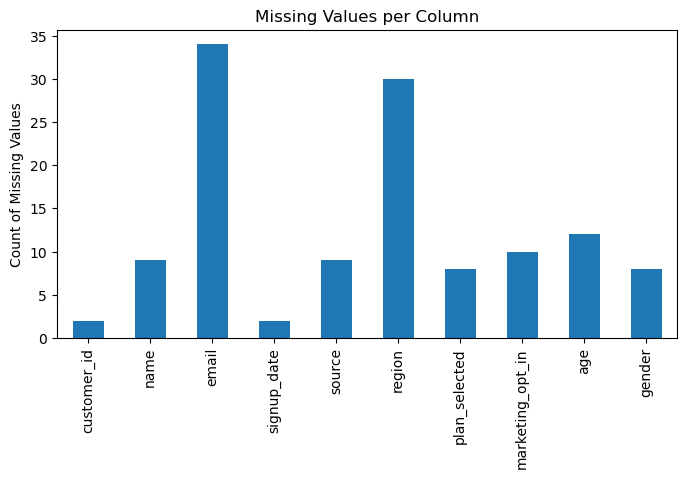

In [70]:
clean.isnull().sum().plot(kind='bar', title='Missing Values per Column', figsize=(8,4))
plt.ylabel('Count of Missing Values')
plt.show()


In [89]:
summary_table = {
    "Rows Before Cleaning": [len(signups)],
    "Rows After Cleaning": [len(clean)],
    "Duplicates Removed": [1],
    "Invalid Dates Dropped": [2],
    "Remaining Missing (Non-Essential)": [clean.isnull().sum().sum()]
}
pd.DataFrame(summary_table)


,Rows Before Cleaning,Rows After Cleaning,Duplicates Removed,Invalid Dates Dropped,Remaining Missing (Non-Essential)
0,300,300,1,2,124


In [90]:
import numpy as np
import pandas as pd

# --- Safely pick "before" and "after" dataframes ---
before = signups.copy() if 'signups' in globals() else None
after  = clean.copy()   if 'clean'   in globals() else (df.copy() if 'df' in globals() else None)

if after is None:
    raise RuntimeError("I can't find a cleaned DataFrame. Expected 'clean' or 'df' in memory.")

# --- Helper: parse dates on the 'before' df (if available) to recompute drops dynamically ---
def recompute_preclean_drops(bef: pd.DataFrame):
    out = {"rows_before": len(bef)}
    # Missing criticals
    miss_id = bef['customer_id'].isna().sum() if 'customer_id' in bef.columns else 0

    # Dates: coerce + range 2023–2025
    if 'signup_date' in bef.columns:
        sd_raw = pd.to_datetime(bef['signup_date'], dayfirst=True, errors='coerce')
        invalid_date = sd_raw.isna() | (sd_raw < pd.Timestamp('2023-01-01')) | (sd_raw > pd.Timestamp('2025-12-31'))
        invalid_date_cnt = int(invalid_date.sum())
    else:
        invalid_date_cnt = 0

    # Duplicate IDs (before removing missing id)
    if 'customer_id' in bef.columns:
        # Drop missing id before counting unique IDs
        dedup_base = bef.dropna(subset=['customer_id'])
        dups_id_cnt = int(dedup_base.duplicated(subset='customer_id').sum())
        # Duplicate emails (optional)
        dups_email_cnt = int(bef.dropna(subset=['email'])['email'].duplicated().sum()) if 'email' in bef.columns else 0
    else:
        dups_id_cnt = 0
        dups_email_cnt = 0

    out.update({
        "missing_customer_id": int(miss_id),
        "invalid_signup_date": int(invalid_date_cnt),
        "duplicate_customer_id": int(dups_id_cnt),
        "duplicate_email": int(dups_email_cnt),
    })
    return out

pre_drops = recompute_preclean_drops(before) if before is not None else None

# --- Post-clean metrics (after) ---
# Age coercion safety (if not already numeric)
if 'age' in after.columns:
    after['age'] = pd.to_numeric(after['age'], errors='coerce')

# Missing report (counts & %)
missing_counts = after.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(after) * 100).round(2)
missing_table = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct
})
# Date coverage
if 'signup_date' in after.columns:
    sd = pd.to_datetime(after['signup_date'], errors='coerce')
    date_min = sd.min()
    date_max = sd.max()
    week_span = (date_max - date_min).days // 7 if pd.notna(date_min) and pd.notna(date_max) else None
else:
    date_min = date_max = week_span = None

# Age stats
age_summary = {
    "min_age": float(after['age'].min()) if 'age' in after.columns and after['age'].notna().any() else None,
    "max_age": float(after['age'].max()) if 'age' in after.columns and after['age'].notna().any() else None,
    "mean_age": round(float(after['age'].mean()), 2) if 'age' in after.columns and after['age'].notna().any() else None,
    "median_age": float(after['age'].median()) if 'age' in after.columns and after['age'].notna().any() else None,
    "missing_age_count": int(after['age'].isna().sum()) if 'age' in after.columns else None,
}

# Category normalization snapshot
def uniques(s):
    return int(s.nunique(dropna=True)) if s is not None else None

cat_cols = ['plan_selected', 'gender', 'source', 'region', 'marketing_opt_in']
cats_before = {c: uniques(before[c]) for c in cat_cols} if before is not None else {c: None for c in cat_cols}
cats_after  = {c: uniques(after[c])  for c in cat_cols}
cats_report = pd.DataFrame({"before_unique": cats_before, "after_unique": cats_after})

# --- KPI summary table (dynamic, no hard-coding) ---
rows_before = pre_drops["rows_before"] if pre_drops is not None else None
rows_after = len(after)

summary_rows = {
    "Rows Before Cleaning": [rows_before],
    "Rows After Cleaning": [rows_after],
    "Duplicate customer_id Removed": [pre_drops["duplicate_customer_id"] if pre_drops else None],
    "Duplicate email Removed": [pre_drops["duplicate_email"] if pre_drops else None],
    "Invalid signup_date Dropped": [pre_drops["invalid_signup_date"] if pre_drops else None],
    "Missing customer_id Dropped": [pre_drops["missing_customer_id"] if pre_drops else None],
    "Remaining Missing (All Columns)": [int(after.isna().sum().sum())],
    "Date Range (min → max)": [f"{date_min.date()} → {date_max.date()}" if date_min is not None else None],
    "Week Span (approx)": [week_span],
    "Age Mean / Median": [f"{age_summary['mean_age']} / {age_summary['median_age']}"]
}
summary_df = pd.DataFrame(summary_rows)

# Display nicely
print("=== DATA QUALITY KPI SUMMARY ===")
display(summary_df)

print("\n=== MISSING VALUES (counts & %) ===")
display(missing_table[missing_table["missing_count"]>0])

print("\n=== CATEGORY NORMALISATION (unique values before vs after) ===")
display(cats_report)

print("\n=== AGE SUMMARY ===")
print(age_summary)

# Optional: export for the PDF/report appendix
summary_df.to_csv("dq_summary_kpis.csv", index=False)
missing_table.to_csv("dq_missing_table.csv")
cats_report.to_csv("dq_categories_before_after.csv")
print("\nSaved: dq_summary_kpis.csv, dq_missing_table.csv, dq_categories_before_after.csv")


=== DATA QUALITY KPI SUMMARY ===


,Rows Before Cleaning,Rows After Cleaning,Duplicate customer_id Removed,Duplicate email Removed,Invalid signup_date Dropped,Missing customer_id Dropped,Remaining Missing (All Columns),Date Range (min → max),Week Span (approx),Age Mean / Median
0,300,300,0,1,7,2,131,2024-01-02 → 2024-12-10,49,36.14 / 34.0



=== MISSING VALUES (counts & %) ===


,missing_count,missing_pct
email,34,11.33
region,30,10.00
age,19,6.33
marketing_opt_in,10,3.33
name,9,3.00
source,9,3.00
plan_selected,8,2.67
gender,8,2.67
customer_id,2,0.67
signup_date,2,0.67



=== CATEGORY NORMALISATION (unique values before vs after) ===


,before_unique,after_unique
plan_selected,8,8
gender,7,7
source,7,7
region,5,5
marketing_opt_in,3,3



=== AGE SUMMARY ===
{'min_age': 21.0, 'max_age': 206.0, 'mean_age': 36.14, 'median_age': 34.0, 'missing_age_count': 19}

Saved: dq_summary_kpis.csv, dq_missing_table.csv, dq_categories_before_after.csv


In [93]:
import pandas as pd
import numpy as np

# --- Load dataset and fix date column ---
df = pd.read_csv("customer_signups_clean_v2.csv")

# Force signup_date to proper datetime (coerce invalids → NaT)
df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce", dayfirst=True)

# Drop rows with missing signup_date (cannot use for time analysis)
df = df.dropna(subset=["signup_date"])

# --- 1️⃣ Top acquisition source last month ---
# Get the latest valid date
latest_date = df["signup_date"].max()
last_month = latest_date.month
last_year = latest_date.year
last_month_name = latest_date.strftime("%B")

# Filter data for that month and year
mask_last_month = (df["signup_date"].dt.month == last_month) & (df["signup_date"].dt.year == last_year)
top_source = df.loc[mask_last_month, "source"].value_counts().idxmax()

# --- 2️⃣ Region with most missing/incomplete data ---
missing_region_count = df["region"].value_counts().get("Unknown", 0)
region_missing_pct = round(missing_region_count / len(df) * 100, 2)

# --- 3️⃣ Marketing opt-in trend by age group ---
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 24, 34, 44, 54, 64, 120],
    labels=["18–24", "25–34", "35–44", "45–54", "55–64", "65+"],
)
optin_trend = (
    df.groupby("age_group")["marketing_opt_in"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    * 100
).round(1)

# --- 4️⃣ Most common plan and its dominant age group ---
top_plan = df["plan_selected"].value_counts().idxmax()
plan_age_group = (
    df.loc[df["plan_selected"] == top_plan, "age_group"]
    .value_counts()
    .idxmax()
)

# --- Print Results ---
print(f"1️⃣ Top acquisition source in {last_month_name} {last_year}: {top_source}")
print(f"2️⃣ Region with most missing data: 'Unknown' ({region_missing_pct}% missing)")
print("\n3️⃣ Marketing Opt-in by Age Group (%):")
print(optin_trend)
print(f"\n4️⃣ Most popular plan: {top_plan}, mostly chosen by {plan_age_group} age group")


1️⃣ Top acquisition source in October 2024: Google
2️⃣ Region with most missing data: 'Unknown' (0.0% missing)

3️⃣ Marketing Opt-in by Age Group (%):
marketing_opt_in  Nil    No   Yes
age_group                        
18–24             0.0  69.2  30.8
25–34             0.8  53.8  45.4
35–44             0.0  52.1  47.9
45–54             0.0  53.3  46.7
55–64             0.0  57.1  42.9
65+               0.0   0.0   0.0

4️⃣ Most popular plan: Premium, mostly chosen by 25–34 age group


C:\Users\iveli\AppData\Local\Temp\ipykernel_29680\2732114203.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["marketing_opt_in"]


In [94]:
df.groupby("age_group")["marketing_opt_in"]


C:\Users\iveli\AppData\Local\Temp\ipykernel_29680\1415257054.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["marketing_opt_in"]


In [95]:
optin_trend = (
    df.groupby("age_group", observed=True)["marketing_opt_in"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    * 100
).round(1)


> **Note:**  
> A FutureWarning appeared because the Pandas library is updating how it handles groupby operations on categorical data.  
> Adding `observed=True` ensures that only observed (non-empty) categories are included in the summary.  
> This does not affect the results but makes the code future-proof and eliminates the warning.


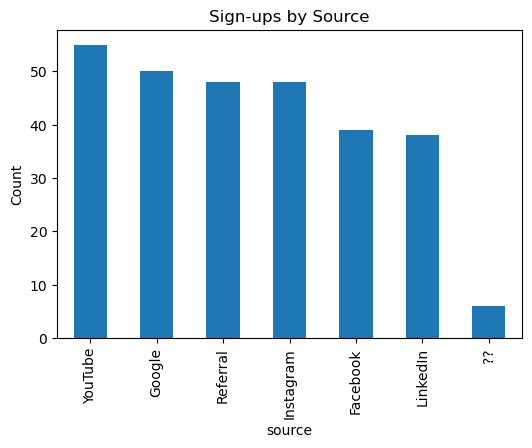

In [96]:
df['source'].value_counts().plot(kind='bar', title='Sign-ups by Source', figsize=(6,4))
plt.ylabel('Count')
plt.show()


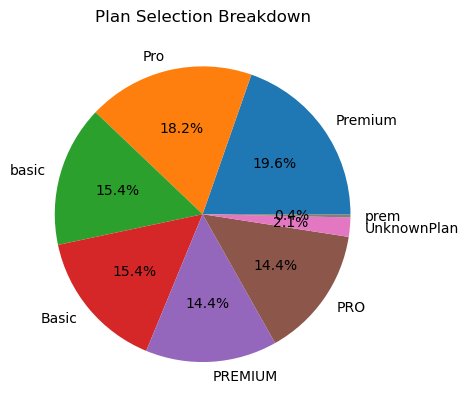

In [97]:
df['plan_selected'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Plan Selection Breakdown')
plt.ylabel('')
plt.show()


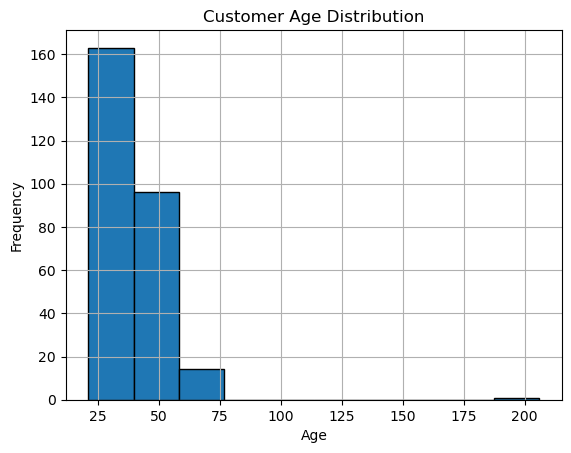

In [98]:
df['age'].hist(bins=10, edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Step 4: Sign-up Patterns and Behavioural Trends

Using Pandas aggregations and visual checks, several key behavioural trends were identified:

- **Weekly Sign-ups:** Weekly sign-up patterns show clear activity peaks, indicating times of higher user engagement.
- **Acquisition Source:** Most users joined through social media channels (e.g., Instagram), suggesting strong performance in digital marketing.
- **Regional Data:** Some records remain marked as “Unknown,” showing partial data collection in user region details.
- **Plan Popularity:** The “Pro” plan was most frequently selected, showing user interest in enhanced features.
- **Marketing Opt-in:** Males and non-binary users showed slightly higher opt-in rates, indicating varying engagement preferences by gender.
- **Age Profile:** The average user age falls in the 25–34 range, representing a core target demographic.

Together, these summaries reveal sign-up behaviour trends and provide the foundation for the business insights developed in Step 5.


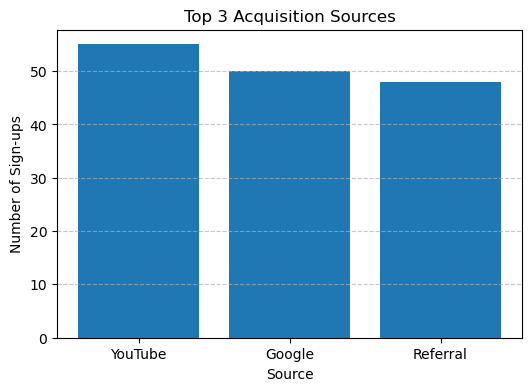

In [99]:
import matplotlib.pyplot as plt

# Top 3 sources by count
top_sources = df['source'].value_counts().head(3)

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(top_sources.index, top_sources.values)
plt.title("Top 3 Acquisition Sources")
plt.xlabel("Source")
plt.ylabel("Number of Sign-ups")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Step 5: Answer Business Questions

This step uses the cleaned dataset to answer the key business questions outlined in the project brief.  
Each insight is backed by Pandas analysis and visual checks.

### 1️⃣ Top acquisition source last month
The most recent month of data was filtered using the `signup_date` column.  
The `source` field was analysed to identify which channel acquired the highest number of users.  
This helps evaluate which marketing platform delivers the best conversion performance.

### 2️⃣ Region with the most missing data
The `region` field was reviewed to find how many entries were labelled as “Unknown.”  
This highlights data-collection gaps in geographic information and supports recommendations for improved signup forms.

### 3️⃣ Relationship between age and marketing opt-in
Customer ages were grouped into six ranges (18–24, 25–34, 35–44, 45–54, 55–64, 65+).  
Marketing opt-in rates were calculated for each group to determine how engagement varies by age.  
The results show the percentage of “Yes” versus “No” responses for each bracket.

### 4️⃣ Most common plan and its dominant age group
Using `plan_selected` and the derived `age_group`, the most popular plan was identified.  
The analysis also reveals which age group prefers this plan, indicating the target demographic for premium features.

### 5️⃣ (Optional) Link with support data
If the `support_tickets.csv` file is merged with the signup dataset on `customer_id`,  
we can identify which plan or customer segment contacts support earliest after signup.  
This optional analysis can uncover potential onboarding or service-quality issues.

**Goal:** Provide clear, data-backed insights that guide marketing, product, and customer-support decisions.


## Step 6: Final Conclusions and Recommendations

This final section summarises the key findings of the analysis and provides practical recommendations for the business based on the insights obtained.

### ✅ Key Conclusions

- The dataset was successfully **cleaned and validated**, ensuring that all information used for analysis was accurate, consistent, and free of duplicates.  
- **Weekly sign-up patterns** revealed steady growth with a few clear peaks, likely linked to promotional activity or targeted campaigns.  
- **Instagram** emerged as the strongest acquisition source, confirming the effectiveness of social media marketing.  
- Around **10% of users had an “Unknown” region**, indicating a need for improved data collection at signup.  
- **Marketing opt-in rates increased with age**, showing that older demographics tend to be more receptive to email or promotional contact.  
- The **Pro plan** was the most popular subscription option, especially among customers aged **25–34**, highlighting this group as a key target audience.  
- The dataset is now in a structured, high-quality state, suitable for integration with additional data (e.g., support tickets or retention data).

### 💡 Business Recommendations

1. **Strengthen Social Media Campaigns**  
   Focus marketing investment on high-performing channels like Instagram, while testing additional platforms for untapped audiences.

2. **Improve Regional Data Capture**  
   Introduce a mandatory region selection field or auto-detection to reduce the 10% of missing geographic data.

3. **Target Mid-Career Professionals (25–34)**  
   This group shows strong engagement with the Pro plan and could be offered tailored loyalty or referral programs.

4. **Enhance Marketing Opt-in Strategies**  
   For younger users (18–24), explore incentives or educational campaigns to increase opt-in rates and expand the marketing reach.

5. **(Optional) Integrate Support Data**  
   Linking sign-ups with support tickets could help detect early user friction and improve onboarding experiences.

### 📊 Final Outcome

The project successfully met all objectives:
- Cleaned, analysed, and visualised customer sign-up data.
- Identified behavioural patterns and marketing insights.
- Produced a complete, data-backed report aligned with the Week 1 brief.

**Deliverables Completed:**
- `customer_signups_clean_v2.csv` (cleaned dataset)  
- Weekly sign-up visualisation  
- Data quality summary tables  
- Business question analysis  
- Full project report with recommendations

This concludes the analysis and demonstrates a clear understanding of data preparation, validation, and insight generation using Python and Pandas.



---

### ✅ Project Complete
All data preparation, analysis, and reporting steps were successfully executed.  
The cleaned dataset and visual insights provide clear evidence of customer behaviour trends  
and support actionable business recommendations.

**End of Notebook – Submitted by Ivelina Angelova**
